In [1]:
import numpy as np
import scipy.sparse as sparse
import h5py as h5
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.color
import skimage.feature
import sklearn.ensemble
from matplotlib.colors import LinearSegmentedColormap
from copy import copy, deepcopy

/home/paul/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def gen_laplacian(n_pixel):
    num = n_pixel*n_pixel
    diag = np.ones(num)*4
    diag[np.arange(num)%n_pixel==0] = 3
    diag[np.arange(num)%n_pixel==n_pixel-1] = 3
    diag[:n_pixel] -= 1
    diag[-n_pixel:] -= 1
    r_diag = np.ones(num-1)*(-1)
    l_diag = np.ones(num-1)*(-1)
    r_diag[np.arange(num-1)%n_pixel==n_pixel-1] = 0
    l_diag[np.arange(num-1)%n_pixel==n_pixel-1] = 0
    t_diag = np.ones(num-n_pixel)*(-1)
    b_diag = np.ones(num-n_pixel)*(-1)
    diagonals = [t_diag, l_diag, diag, r_diag, b_diag]
    L = sparse.diags(diagonals, [-n_pixel,-1, 0, 1,n_pixel], format="csr")
    return(L)

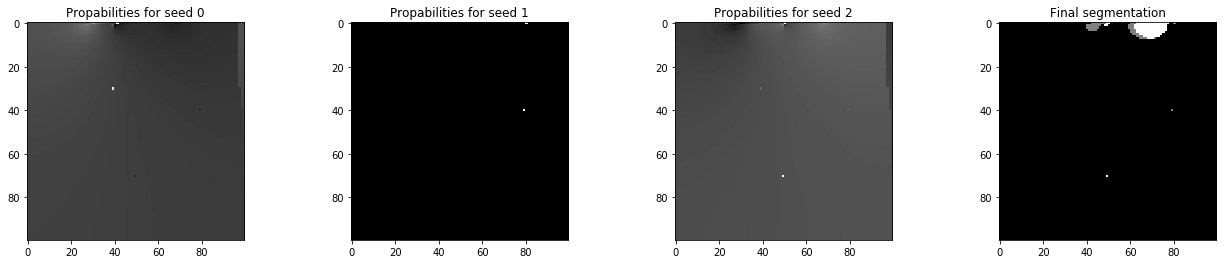

In [3]:
#EX01:

image = np.zeros((100, 100))
L = gen_laplacian(image.shape[0])
seeds = [[30, 40]
         ,[40, 80]
         ,[70, 50]]

colums = list(range(image.shape[0] * image.shape[1]))
colums.remove(seeds[0][1])
colums.remove(seeds[1][1])
colums.remove(seeds[2][1])
rows = list(range(image.shape[0] * image.shape[1]))
rows.remove(seeds[0][0])
rows.remove(seeds[1][0])
rows.remove(seeds[2][0])

A = sparse.csr_matrix(L[:,colums])
A = sparse.csr_matrix(A[rows,:])
B = np.zeros((A.shape[1] , 3))

for i in range(B.shape[0]):
    B[i, 0] = L[i, 40]
    B[i, 1] = L[i, 80]
    B[i, 2] = L[i, 50]

x = []
    
for i in range(B.shape[1]):
    x.append(list(sparse.linalg.spsolve(A, B[:,i])))

x[0].insert(image.shape[1]*seeds[0][0]+seeds[0][1]-1, 1)
x[1].insert(image.shape[1]*seeds[0][0]+seeds[0][1]-1, 0)
x[2].insert(image.shape[1]*seeds[0][0]+seeds[0][1]-1, 0)

x[0].insert(image.shape[1]*seeds[1][0]+seeds[1][1]-1, 0)
x[1].insert(image.shape[1]*seeds[1][0]+seeds[1][1]-1, 1)
x[2].insert(image.shape[1]*seeds[1][0]+seeds[1][1]-1, 0)

x[0].insert(image.shape[1]*seeds[2][0]+seeds[2][1]-1, 0)
x[1].insert(image.shape[1]*seeds[2][0]+seeds[2][1]-1, 0)
x[2].insert(image.shape[1]*seeds[2][0]+seeds[2][1]-1, 1)

x_fin = []

for i in range(len(x[0])):
    tmp = np.array([x[0][i], x[1][i], x[2][i]])
    x_fin.append(np.argmax(tmp))

propa_s0 = np.reshape(x[0],(image.shape[0],image.shape[1]))
propa_s1 = np.reshape(x[1],(image.shape[0],image.shape[1]))
propa_s2 = np.reshape(x[2],(image.shape[0],image.shape[1]))
seg = np.reshape(x_fin,(image.shape[0],image.shape[1]))

fig = plt.figure()
ax0 = fig.add_subplot(141)
ax1 = fig.add_subplot(142)
ax2 = fig.add_subplot(143)
ax3 = fig.add_subplot(144)
fig.subplots_adjust(right=3)

ax0.set_title('Propabilities for seed 0')
ax0.imshow(propa_s0, cmap='gray')
ax1.set_title('Propabilities for seed 1')
ax1.imshow(propa_s1, cmap='gray')
ax2.set_title('Propabilities for seed 2')
ax2.imshow(propa_s2, cmap='gray')
ax3.set_title('Final segmentation')
ax3.imshow(seg, cmap='gray')


